<a href="https://colab.research.google.com/github/DEli-26/DS_Practicum/blob/main/04_megaline_income/deli_proj_pract_04_megaline_income_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6><b>**Проект Я.Практикум №4**</b></font>

<font size=6><b>**Мегалайн. Доход**</b></font>

***

# Постановка задачи

**Заказчик:** Коммерческий департамент компании «Мегалайн» — федерального оператора сотовой связи. 

**Цель:** определить, какой тариф приносит больше денег - «Смарт» или «Ультра», что позволит скорректировать рекламный бюджет.

**Задачи:** 
1. выполнить предварительный анализ тарифов на небольшой выборке клиентов;
1. проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Исходные данные:** данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Описание тарифов

|                              | Тариф «Смарт» | Тариф «Ультра» |
| :----------------------      | ------------- | -------------- |
| Ежемесячная плата, руб       | 550           | 1950           |
| **Включено в тариф:**
| Минут разговора, шт.     | 500 | 3000 |
| Сообщений, шт.           | 50 | 1000 |
| Интернет-трафик, Гб | 15 | 30 |
| **Стоимость услуг сверх тарифного пакета:**
| 1 минута разговора, руб. | 3 | 1 |
| 1 сообщение, руб. | 3 | 1 |
| 1 Гб интернет-трафика | 200 | 150 |

Примечание:
«Мегалайн» всегда округляет в большую сторону секунды разговора до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Обзор данных

## Загрузка библиотек и данных

Загрузим библиотеки, необходимые для выполнения проекта

In [ ]:
!pip install nb_black

%load_ext nb_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from scipy import stats as st

# отображение таблиц без ограничения на количество столбцов:
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

Исходные данные находятся в 5 файлах.

-- Здесь был код загрузки данных из Google Drive --

## Таблица calls

Откроем первые 5 строк, а также общую информацию.

In [ ]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<IPython.core.display.Javascript object>

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<IPython.core.display.Javascript object>

**Описание данных в таблице calls (информация о звонках):**
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

## Таблица internet

Откроем первые 5 строк, а также общую информацию.

In [ ]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<IPython.core.display.Javascript object>

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


<IPython.core.display.Javascript object>

**Описание данных в таблице internet (информация об интернет-сессиях):**
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

## Таблица messages

Откроем первые 5 строк, а также общую информацию.

In [ ]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<IPython.core.display.Javascript object>

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


<IPython.core.display.Javascript object>

**Описание данных в таблице messages (информация о сообщениях):**
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

## Таблица tariffs

Откроем первые 5 строк, а также общую информацию.

In [ ]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<IPython.core.display.Javascript object>

In [ ]:
math.ceil(50 + 5) / 1024

0.0537109375

<IPython.core.display.Javascript object>

In [ ]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


<IPython.core.display.Javascript object>

**Описание данных в таблице tariffs (информация о тарифах):**
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Таблица users

Откроем первые 5 строк, а также общую информацию.

In [ ]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<IPython.core.display.Javascript object>

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<IPython.core.display.Javascript object>

**Описание данных в таблице users (информация о пользователях):**
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

## Заключение по обзору данных

Весь датасет разделен на 5 файлов, в которых содержатся таблицы с информацией соответственно о пользователях, о звонках, о сообщениях, об интернет-сессиях и о тарифах. 

В данных встречаются следующие ошибки:

* неправильный тип для хранения дат в таблицах `calls`, `internet`, `messages`, `users`;
* лишний столбец `Unnamed: 0` в таблице `internet`;

Пропуски в столбце `churn_date` таблицы `users` не являются ошибкой, а означают действительность тарифа на момент выгрузки данных.

Звонки с нулевой продолжительностью в таблице `calls` так же не ошибка: нулями обозначены пропущенные звонки, поэтому их не будем удалять.

В каждой таблице есть столбец с уникальным идентификатором пользователя, а значит, они могут быть объединены в один dataframe. 

Чтобы двигаться дальше, нужно устранить перечисленные ошибки и провести группировку данных.

# Предобработка данных

## Исправление ошибок в данных

Тип данных исправим при помощи метода `to_datetime`. 

In [ ]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format="%Y-%m-%dT%H:%M:%S")
internet["session_date"] = pd.to_datetime(
    internet["session_date"], format="%Y-%m-%dT%H:%M:%S"
)
messages["message_date"] = pd.to_datetime(
    messages["message_date"], format="%Y-%m-%dT%H:%M:%S"
)
users["churn_date"] = pd.to_datetime(users["churn_date"], format="%Y-%m-%dT%H:%M:%S")
users["reg_date"] = pd.to_datetime(users["reg_date"], format="%Y-%m-%dT%H:%M:%S")

<IPython.core.display.Javascript object>

Лишний столбец в таблице `internet` удалим при помощи метода `drop` и проверим результат.

In [ ]:
internet = internet.drop(labels="Unnamed: 0", axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<IPython.core.display.Javascript object>

## Группирование данных

Перед группировкой данных обработаем информацию о длительности звонков. Согласно исходным данным, каждый звонок округляется отдельно в большую сторону. Для этого применим метод `np.ceil()`:

In [ ]:
calls["duration"] = np.ceil(calls["duration"]).astype(int)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<IPython.core.display.Javascript object>

Группировка всех пяти таблиц представляется не рациональной и избыточной. Вместо этого посчитаем при помощи метода `pivot_table` отдельно для каждого пользователя по месяцам:
* количество сделанных звонков и израсходованных минут разговора;
* количество отправленных сообщений;
* объем израсходованного интернет-трафика.

Запишем полученные результаты в отдельные таблицы и объединим их методом `merge` по столбцам `user_id` и `month` в одну таблицу. После добавим в эту же таблицу название тарифов пользователей.

Получившиеся в ходе объединения пропуски означают, что пользователи не использовали тот или иной сервис, заполнение их нулями позволит лучше проанализировать данные об использовании тарифов за счет увеличения количества используемых данных.

In [ ]:
calls["month"] = pd.DatetimeIndex(calls["call_date"]).month
calls_id_month = calls.pivot_table(
    index=["user_id", "month"],
    values="duration",
    aggfunc=["sum", "count"],
)

internet["month"] = pd.DatetimeIndex(internet["session_date"]).month
internet_id_month = internet.pivot_table(
    index=["user_id", "month"],
    values="mb_used",
    aggfunc=["sum"],
)

messages["month"] = pd.DatetimeIndex(messages["message_date"]).month
messages_id_month = messages.pivot_table(
    index=["user_id", "month"],
    values="message_date",
    aggfunc=["count"],
)

df = (
    calls_id_month.merge(
        internet_id_month, on=["user_id", "month"], how="outer", sort=True
    )
    .merge(messages_id_month, on=["user_id", "month"], how="outer")
    .reset_index()
    .set_index("user_id")
    .merge(
        users[["user_id", "tariff"]],
        left_on=["user_id"],
        right_on=["user_id"],
        how="right",
    )
).fillna(0)

df.columns = [
    "user_id",
    "month",
    "calls_duration_sum",
    "calls_count",
    "mb_used_sum",
    "message_count",
    "tariff",
]

df[["user_id", "month", "calls_duration_sum", "calls_count", "message_count",]] = df[
    [
        "user_id",
        "month",
        "calls_duration_sum",
        "calls_count",
        "message_count",
    ]
].astype(int)

df.tail(10)

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,month,calls_duration_sum,calls_count,mb_used_sum,message_count,tariff
3206,1497,11,371,64,14156.08,14,smart
3207,1497,12,545,71,19918.60,17,smart
3208,1498,7,175,23,7476.24,20,smart
3209,1498,8,400,57,24235.21,62,smart
3210,1498,9,471,59,22134.41,44,smart
3211,1498,10,247,41,20579.36,42,smart
3212,1499,9,70,9,1845.75,11,smart
3213,1499,10,449,68,17788.51,48,smart
3214,1499,11,612,74,17963.31,59,smart
3215,1499,12,492,69,13055.58,66,smart


<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3216 non-null   int64  
 1   month               3216 non-null   int64  
 2   calls_duration_sum  3216 non-null   int64  
 3   calls_count         3216 non-null   int64  
 4   mb_used_sum         3216 non-null   float64
 5   message_count       3216 non-null   int64  
 6   tariff              3216 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 201.0+ KB


<IPython.core.display.Javascript object>

<div style="border-left: 7px solid blue">
Проверим количество пользователей в объединенной таблице. Их значение должно быть равно значению в исходных данных.
</div>

In [ ]:
df["user_id"].nunique()

500

<IPython.core.display.Javascript object>

Проверим наличие нулей в столбце `month`, так как их проявление означает, что пользователи зарегистрированы, но не осуществляют никакой активности.

In [ ]:
month_zero = df[df["month"] == 0]
month_zero

,user_id,month,calls_duration_sum,calls_count,mb_used_sum,message_count,tariff
827,1128,0,0,0,0.0,0,ultra
2335,1371,0,0,0,0.0,0,smart


<IPython.core.display.Javascript object>

Нулевых значения всего два. Причем для обоих отсутствует всякая информация об активности. Проверим всю информацию о тех же пользователях в таблице `users`:

In [ ]:
users[users["user_id"].isin(month_zero["user_id"].tolist())]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


<IPython.core.display.Javascript object>

Из таблицы видно, что пользователи с id 1128 и 1371 зарегистрировались в декабре и тут же сменили тарифный план. В результате, в системе не сохранились данные об их активности. Таким образом, информацию об этих пользователях можно удалить из обобщенной таблицы.

In [ ]:
df = df.drop(month_zero.index.tolist()).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3214 non-null   int64  
 1   month               3214 non-null   int64  
 2   calls_duration_sum  3214 non-null   int64  
 3   calls_count         3214 non-null   int64  
 4   mb_used_sum         3214 non-null   float64
 5   message_count       3214 non-null   int64  
 6   tariff              3214 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 175.9+ KB


<IPython.core.display.Javascript object>

## Расчет помесячной выручки

Определим помесячную выручку с каждого пользователя. Для этого создадим функцию `income`, которая:
* обрабатывает строки таблицы `df`; 
* вычитает бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
* остаток умножает на значение из тарифного плана; 
* прибавляет абонентскую плату, соответствующую тарифному плану.

In [ ]:
def income(row):
    # Обнуление расчетных переменных
    inc1 = 0
    inc2 = 0
    inc3 = 0
    inc4 = 0

    # Объявляем переменные текущего массива
    cll_dur = row["calls_duration_sum"]
    mb = row["mb_used_sum"]
    mss = row["message_count"]
    uid = row["user_id"]
    trff = row["tariff"]
    # И переменные из других таблиц
    min_incl = tariffs.loc[
        tariffs["tariff_name"] == trff,
        "minutes_included",
    ].reset_index(drop=True)[0]
    min_extra = tariffs.loc[
        tariffs["tariff_name"] == trff,
        "rub_per_minute",
    ].reset_index(drop=True)[0]
    mb_incl = tariffs.loc[
        tariffs["tariff_name"] == trff,
        "mb_per_month_included",
    ].reset_index(drop=True)[0]
    mb_extra = tariffs.loc[tariffs["tariff_name"] == trff, "rub_per_gb",].reset_index(
        drop=True
    )[0]
    mss_incl = tariffs.loc[
        tariffs["tariff_name"] == trff,
        "messages_included",
    ].reset_index(drop=True)[0]
    mss_extra = tariffs.loc[
        tariffs["tariff_name"] == trff,
        "rub_per_message",
    ].reset_index(drop=True)[0]

    # Вычисляем расчетные переменные
    inc1 = tariffs.loc[tariffs["tariff_name"] == trff, "rub_monthly_fee",].reset_index(
        drop=True
    )[0]

    if cll_dur > min_incl:
        inc2 = (cll_dur - min_incl) * min_extra

    if mb > mb_incl:
        inc3 = np.ceil((mb - mb_incl) / 1024) * mb_extra

    if mss > mss_incl:
        inc4 = (mss - mss_incl) * mss_extra

    return inc1 + inc2 + inc3 + inc4

<IPython.core.display.Javascript object>

In [ ]:
df["income"] = df.apply(income, axis=1).astype(int)
df.tail()

,user_id,month,calls_duration_sum,calls_count,mb_used_sum,message_count,tariff,income
3209,1498,10,247,41,20579.36,42,smart,1750
3210,1499,9,70,9,1845.75,11,smart,550
3211,1499,10,449,68,17788.51,48,smart,1150
3212,1499,11,612,74,17963.31,59,smart,1513
3213,1499,12,492,69,13055.58,66,smart,598


<IPython.core.display.Javascript object>

Полученный вид таблицы соответствует ожиданиям

## Заключение по предобработке данных

В ходе предобработки данных:

* исправлен тип хранения временных данных;
* удален лишний столбец в таблице `internet`;
* произведена группировка ключевых показателей в одну таблицу;
* выполнен расчет помесячной выручки.

Можно переходить к построению графиков, их анализу и формулированию гипотез.

# Анализ данных

## Анализ поведения клиентов

Проанализируем поведение клиентов оператора, исходя из выборки. Для этого построим гистограммы распределения медианных значений минут разговора, сообщений и объема интернет-трафика, а также гистограммы тех же величин в абсолютном выражении по месяцам.

Медианное значение используется как более устойчивое по сравнению со средним к наличию выбросов в данных.

<div style="border-left: 7px solid blue">
    Не смотря на то, что при расчете стоимости обоих тарифов используются округленные значения минут разговора и объема интернет-трафика здесь и далее будем использовать их абсолютные значения. Это позволит более точно оценить пользователскую активность и выработать критерии для корректировки тарифных планов (при необходимости). 
</div>

In [ ]:
hist_dict_tariff = {
    0: [["smart", "ultra"], "Оба тарифа", "_", "_", "_", "_", "tomato", 0.75],
    1: [["smart"], "Тариф Smart", 500, 15360, 50, 550, "limegreen", 0.75],
    2: [["ultra"], "Тариф Ultra", 3000, 30720, 1000, 1950, "slateblue", 0.75],
}
hist_dict_column = {
    0: ["calls_duration_sum", "Количество минут", "Количество, мин."],
    1: ["mb_used_sum", "Объем интернет-трафика", "Объем, Мб"],
    2: ["message_count", "Количество сообщений", "Количество, шт."],
    3: ["income", "Выручка от тарифа", "Выручка, руб."],
}

<IPython.core.display.Javascript object>

In [ ]:
def hist_by_tariff(agg="median", kxlim=[1, 1, 1], ind=["user_id"]):
    _, axs = plt.subplots(1, 3, figsize=(18, 5))

    for j in range(3):
        for i in range(3):
            a = df.loc[df["tariff"].isin(hist_dict_tariff[j][0])].pivot_table(
                index=ind, values=hist_dict_column[i][0], aggfunc=agg
            )

            axs[i].hist(
                a,
                alpha=hist_dict_tariff[j][7],
                bins=12,
                label=(hist_dict_tariff[j][1]),
                color=hist_dict_tariff[j][6],
                range=(0, a[hist_dict_column[i][0]].max() / kxlim[i]),
            )
            axs[i].set_title(hist_dict_column[i][1])
            axs[i].set_xlabel(hist_dict_column[i][2])
            axs[i].set_ylabel("Количество значений")
            axs[i].grid(True)
            axs[i].axvline(
                a[hist_dict_column[i][0]].mean(),
                color=hist_dict_tariff[j][6],
                linewidth=3,
                linestyle="--",
            )
            axs[i].legend()

<IPython.core.display.Javascript object>

In [ ]:
def bar_by_tariff(agg="median", lim=1):
    _, axs = plt.subplots(1, 4, figsize=(24, 6))
    k = 0  # задает смещение двух столбцов
    for j in range(1, 3):
        for i in range(4):
            axs[i].bar(
                x=np.arange(len(df["month"].unique())) + 0.8 + k,
                height=(
                    df.pivot_table(
                        index=["month"],
                        values=hist_dict_column[i][0],
                        columns="tariff",
                        aggfunc=agg,
                    )[hist_dict_tariff[j][0][0]].tolist()
                ),
                width=0.4,
                alpha=hist_dict_tariff[j][7],
                label=(hist_dict_tariff[j][1]),
                color=hist_dict_tariff[j][6],
            )
            axs[i].set_title(hist_dict_column[i][1])
            axs[i].set_xlabel("Месяцы")
            axs[i].set_ylabel(hist_dict_column[i][2])
            axs[i].axhline(
                hist_dict_tariff[j][2 + i] * lim,
                color=hist_dict_tariff[j][6],
                linewidth=5,
                linestyle="--",
            )
            axs[i].grid(True)
            axs[i].legend()
        k = 0.4

<IPython.core.display.Javascript object>

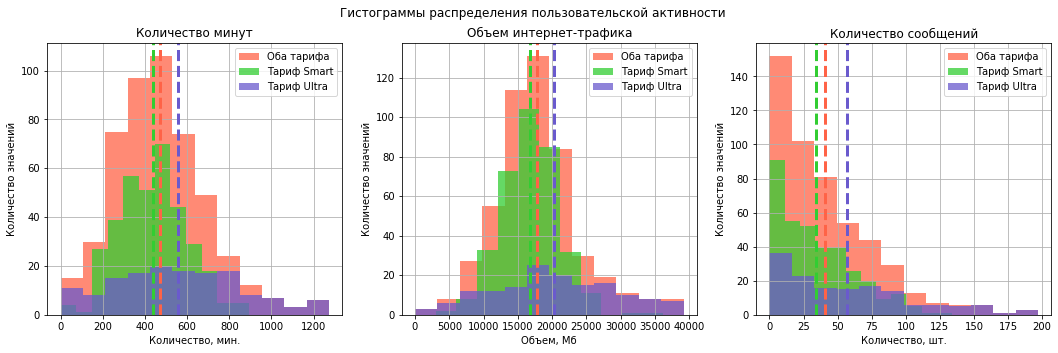

<IPython.core.display.Javascript object>

In [ ]:
hist_by_tariff()
plt.suptitle("Гистограммы распределения пользовательской активности")
plt.show()

Штриховые линии на гистограммах распределения соответствуют среднему значению.

По гистограммам распределения видно, что количество пользователей тарифа Smart превалирует над количеством пользователей тарифа Ultra. В результате чего, средние значения показателей первой группы близки к аналогичным показателям всей выборки.

Распределения активности пользователей тарифа Smart по количеству минут разговора и объему трафика близко к нормальному со смещенным средним, а по количеству сообщений - близко к распределению Пуассона. Активность пользователей тарифа Ultra равномерно распределена, что не позволяет достоверно определить ее характер. 

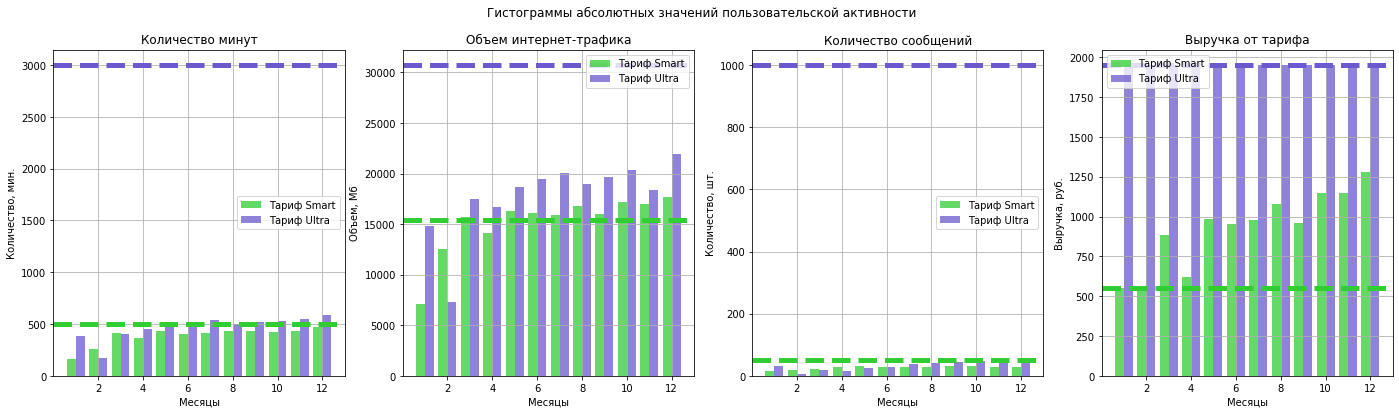

<IPython.core.display.Javascript object>

In [ ]:
bar_by_tariff()
plt.suptitle("Гистограммы абсолютных значений пользовательской активности")
plt.show()

Штриховые линии на гистограммах абсолютных значений соответствуют тарифным лимитам.

По гистограммам абсолютных значений длительности разговоров можно сделать вывод, что пользователи обоих тарифов укладываются в тарифный лимит. Однако пользователи Smart делают это на пределе возможностей, а Ultra - незначительно превосходят лимит первых.

Пользователи тарифа Smart, начиная с мая, регулярно превышают лимит по интернет-трафику. В то же время, аналогично минутам разговора, пользователи Ultra недобирают свой лимит, незначительно превышая пороговое значение первой группы.

Смс-сообщения пользователями обоих тарифов используются не активно, а их количество гарантированно не превышает порогового значения тарифа Smart.

По гистограммам абсолютных значений выручки видно, что пользователи тарифа Ultra, в основном, платят только абонентскую плату. В то время, как пользователи Smart регулярно переплачивают из-за перерасхода интернет-трафика, но эта переплата меньше абонентской платы Ultra.

Построим гистограммы среднего, СКО и дисперсии при помощи созданной функции `bar_by_tariff`.

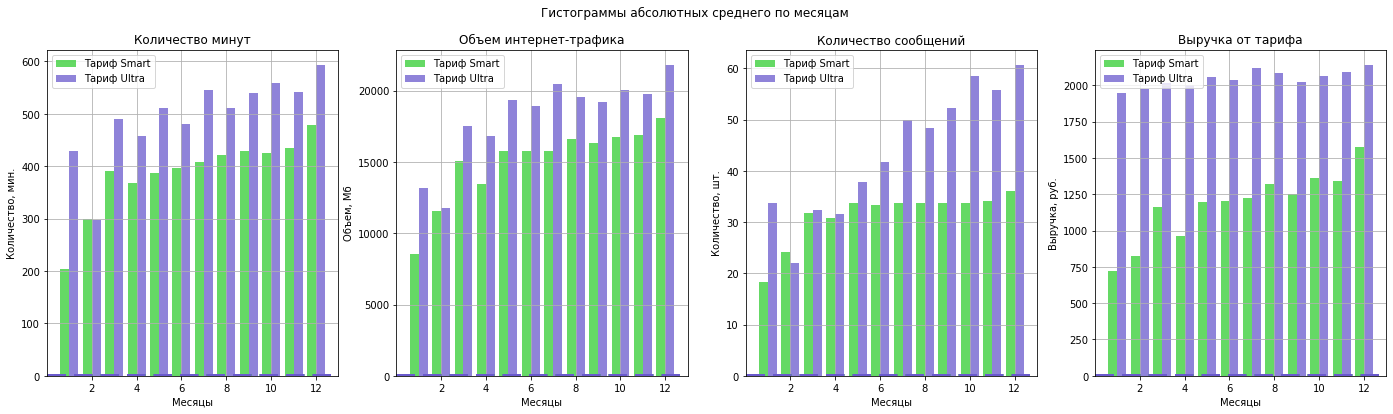

<IPython.core.display.Javascript object>

In [ ]:
bar_by_tariff("mean", lim=0)
plt.suptitle("Гистограммы абсолютных среднего по месяцам")
plt.show()

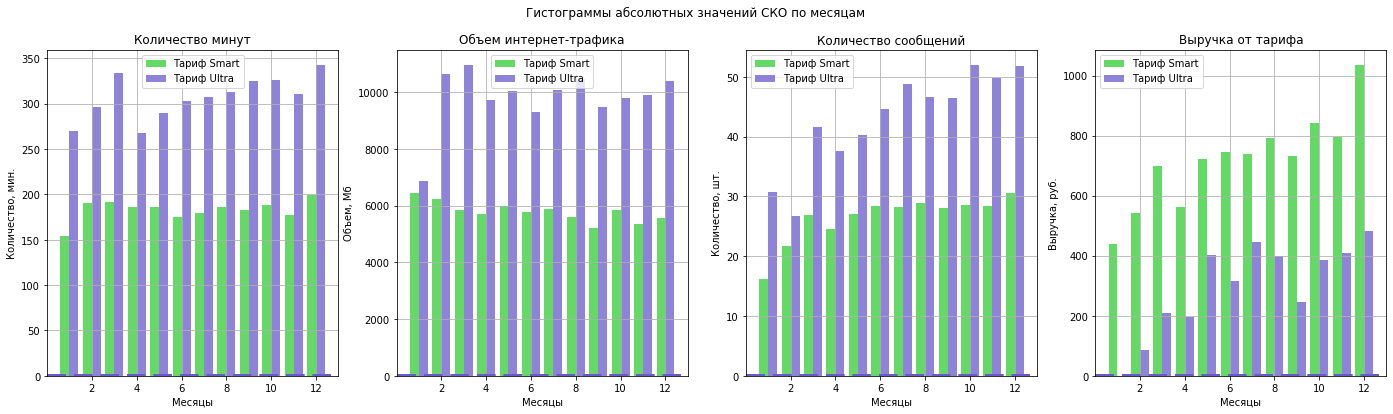

<IPython.core.display.Javascript object>

In [ ]:
bar_by_tariff("std", lim=0)
plt.suptitle("Гистограммы абсолютных значений СКО по месяцам")
plt.show()

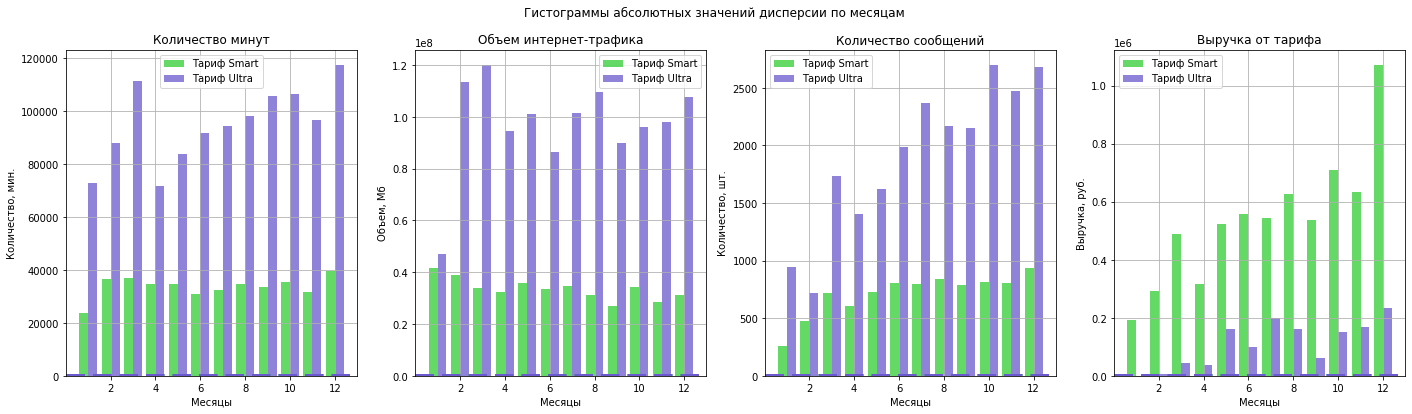

<IPython.core.display.Javascript object>

In [ ]:
bar_by_tariff("var", lim=0)
plt.suptitle("Гистограммы абсолютных значений дисперсии по месяцам")
plt.show()

По гистограммам среднего, СКО и дисперсии видно, что исследуемые характеристики обладают большим разбросом данных. Так, СКО в помесячном рассмотрении находится на уровне среднего значения и, зачастую, может его превышать.

## Проверка гипотезы №1

Проведем проверку следующих основной и альтернативной гипотез:
* Н0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
* Н1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [ ]:
result_hyp_n1 = st.ttest_ind(
    df.loc[df["tariff"] == "smart"]["income"],
    df.loc[df["tariff"] == "ultra"]["income"],
    equal_var=False,  # Выборки разного размера с разной дисперсией
)

result_hyp_n1.pvalue

4.2606313931076085e-250

<IPython.core.display.Javascript object>

Вероятность чрезвычайно мала, а значит, при любом значимом значении уровня значимости (альфа) гипотеза Н0 отвергается. Следовательно, принимаем альтернативную гипотезу.

Посчитаем общую выручку от тарифов за год.

In [ ]:
df.pivot_table(index="tariff", values="income", aggfunc={"sum", "mean"})

,mean,sum
tariff,,
smart,1289.973531,2875351.0
ultra,2070.152284,2039100.0


<IPython.core.display.Javascript object>

In [ ]:
288 / (288 + 204)

0.5853658536585366

<IPython.core.display.Javascript object>

По полученным значениям видно, что выручка от тарифа Smart выше и составляет около 58,5% от общей выручки.

## Проверка гипотезы №2

Проведем проверку следующих основной и альтернативной гипотез:
* H0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
* H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки гипотезы добавим в таблицу столбец со значением города.

In [ ]:
df = users[["user_id", "city"]].merge(df, on="user_id", how="right")
df.head(5)

,user_id,city,month,calls_duration_sum,calls_count,mb_used_sum,message_count,tariff,income
0,1000,Краснодар,5,159,22,2253.49,22,ultra,1950
1,1000,Краснодар,6,172,43,23233.77,60,ultra,1950
2,1000,Краснодар,7,340,47,14003.64,75,ultra,1950
3,1000,Краснодар,8,408,52,14055.93,81,ultra,1950
4,1000,Краснодар,9,466,58,14568.91,57,ultra,1950


<IPython.core.display.Javascript object>

In [ ]:
result_hyp_n2 = st.ttest_ind(
    df.loc[df["city"] == "Москва"]["income"],
    df.loc[df["city"] != "Москва"]["income"],
    equal_var=False,  # Выборки разного размера с разной дисперсией
)

result_hyp_n2.pvalue

0.5257376663729298

<IPython.core.display.Javascript object>

Вероятность более 50%, а значит, при любом разумном значении уровня значимости (альфа) оснований отвергать гипотезу Н0 нет.

Определим распределение количество пользователей по тарифам.

In [ ]:
df.pivot_table(index="tariff", values="user_id", aggfunc={"nunique"})

,nunique
tariff,
smart,350
ultra,148


<IPython.core.display.Javascript object>

In [ ]:
350 / 148

2.364864864864865

<IPython.core.display.Javascript object>

Пользователей Smart в 2,4 раза больше пользователей Ultra.

Проверим распределение пользователей по городам.

In [ ]:
df.pivot_table(
    index=["tariff", "city"], values="user_id", aggfunc={"nunique"}
).sort_values(by="nunique", ascending=False).head(15)

nunique
tariff city                     
smart  Москва                 67
ultra  Москва                 32
smart  Санкт-Петербург        30
       Казань                 13
       Новосибирск            11
       Ульяновск              10
       Екатеринбург            9
       Омск                    9
ultra  Санкт-Петербург         9
smart  Набережные Челны        7
       Самара                  7
       Улан-Удэ                7
ultra  Уфа                     6
smart  Вологда                 6
       Уфа                     6

<IPython.core.display.Javascript object>

Количество пользователей из Москвы составляет около 20% от их общего числа.

# Вывод

Выполнен предварительный анализ тарифов на небольшой выборке клиентов и проанализировано их поведение.

Основные выводы по проведенному анализу следующие.

1. Количество пользователей тарифа Smart в 2,4 раза больше пользователей Ultra.

1. Пользователи обоих тарифов укладываются в тарифный лимит по минутам разговоров и сообщениям. Однако пользователи Smart делают это на пределе возможностей, а Ultra - незначительно превосходят лимит первых. Пользователи тарифа Smart зачастую превышают лимит по интернет-трафику. В то же время, пользователи Ultra недобирают свой лимит, незначительно превышая пороговое значение первой группы.

1. Смс-сообщения пользователями обоих тарифов используются не активно.

1. Пользователи тарифа Ultra, в основном, платят только абонентскую плату. В то время, как пользователи Smart регулярно переплачивают из-за перерасхода интернет-трафика, но эта переплата меньше абонентской платы Ultra.

1. Исследуемые характеристики обладают большим разбросом данных. Так, СКО в помесячном рассмотрении находится на уровне среднего значения и, зачастую, может его превышать.


Тариф Smart приносит около 58,5% выручки от суммарной выручки обоих тарифов за год, следовательно он является наиболее выгодным для компании.
Учитывая полученный результат, можно утверждать, что между двумя тарифами существует большой разрыв пользовательской активности. В этой связи представляется целесообразным разработка промежуточного тарифа, абонентская плата которого будет соизмерима со средней выручкой от тарифа Smart - 1289 руб.